In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#Cleaning text
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\Temor AL-
[nltk_data]     Kaisi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
items = pd.read_csv("20191226-items.csv")
reviews = pd.read_csv("20191226-reviews.csv")

reviews['body'][0]
type(reviews)

pandas.core.frame.DataFrame

In [6]:
reviews.isnull().sum()

asin                0
name                2
rating              0
date                0
verified            0
title              14
body               21
helpfulVotes    40771
dtype: int64

In [7]:
reviews# Remove null values and unneeded features
reviews = reviews.dropna()
#reviews = reviews.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator',
                        #'Score','Time'], 1)
reviews = reviews.reset_index(drop=True)

In [8]:
reviews = pd.merge(reviews, items, how="left", left_on="asin", right_on="asin")

In [9]:
reviews.isnull().sum()

asin               0
name               0
rating_x           0
date               0
verified           0
title_x            0
body               0
helpfulVotes       0
brand            135
title_y            0
url                0
image              0
rating_y           0
reviewUrl          0
totalReviews       0
price              0
originalPrice      0
dtype: int64

In [10]:
# 0.5 Rename columns
reviews.rename(columns={"rating_x": "rating", "title_x": "title", "title_y": "item_title", "rating_y": "overall_rating"}, inplace=True)
#reviews["id"] = reviews.index + 1
reviews.head(15)

,asin,name,rating,date,verified,title,body,helpfulVotes,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,price,originalPrice
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
5,B0000SX2UC,the cell phone store owner,5,"April 16, 2004",False,Wanna cool Nokia? You have it here!,Cool. Cheap. Color: 3 words that describe the ...,2.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
6,B0000SX2UC,Matt,4,"April 3, 2004",False,Problem with 3588i universal headset,"The 3599i is overall a nice phone, except that...",2.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
7,B0000SX2UC,Charles Cook,5,"November 24, 2003",False,cool phone!!!!!!!!,"I've never owned a Nokia phone before, so this...",7.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
8,B0000SX2UC,Amazon Customer,3,"February 2, 2004",False,Pissed off-a little bit,ok well im in school and i need the text messa...,3.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0
9,B0000SX2UC,habblie,4,"December 25, 2004",False,"works great, but don't dropt it",I've had this phone for over a year and I real...,1.0,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,0.0,0.0


In [11]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [12]:
def clean_text(text, remove_stopwords = True):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    return text

In [13]:
clean_texts = []
for text in reviews.body:
    clean_texts.append(clean_text(text))
print("Texts are complete.")

Texts are complete.


In [14]:
clean_texts

['samsung a600 awhile absolute doo doo read review detect rage stupid thing finally died used nokia phone bought garage sale 1 wonder sold cheap bad > hate menu takes forever get want scroll endlessly usually phones numbered categories u simply press get want go > pain put silent vibrate class rings turn immediately fast way silence damn thing always remember put silent learned hard way > true case mission get break ur nails process also damage case time u try reason phone started giving problems succeed opening > buttons could bit bigger vibration could stronger good > reception shabby using elevator remarkable feat considering old phone would lose service simply putting pocket > compared old samsung phone works quite well ring tones loud enough hear phone actually charges quickly great battery life heat like potatoe oven either long phone convos > nice bright large screen > cute ways customize scroll bar set purple pink aqua orange etc overall okay phone serves purpose definitely pal

In [15]:
Motorola = reviews[reviews["brand"]=="Motorola"].sort_values(by=["date"], ascending=False)
Motorola

,asin,name,rating,date,verified,title,body,helpfulVotes,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,price,originalPrice
25432,B07SBJPYLW,Martin L. Cohen,4,"September 9, 2019",False,"Size, color, camera, battery life are great.","Size, color, camera, battery life are great. O...",1.0,Motorola,Motorola One Vision (128GB) 6.3' Full HD Displ...,https://www.amazon.com/Motorola-Display-Factor...,https://m.media-amazon.com/images/I/61mBlkYEC4...,4.3,https://www.amazon.com/product-reviews/B07SBJPYLW,56,240.00,270.00
25429,B07SBJPYLW,Christian Dysthe,2,"September 9, 2019",False,"One of those ""just perfect"" phones but it's no...","Yes this phone ""works"" in the US but it is NOT...",2.0,Motorola,Motorola One Vision (128GB) 6.3' Full HD Displ...,https://www.amazon.com/Motorola-Display-Factor...,https://m.media-amazon.com/images/I/61mBlkYEC4...,4.3,https://www.amazon.com/product-reviews/B07SBJPYLW,56,240.00,270.00
24944,B07RB78W37,Amazon Customer,5,"September 9, 2019",True,It's the best moto z ever appear!,It has a large screen but still able to handle...,1.0,Motorola,Moto Z4 – Unlocked – 128 GB – Flash Gray (US W...,https://www.amazon.com/Moto-Z4-Unlocked-Warran...,https://m.media-amazon.com/images/I/81POiya5gb...,3.7,https://www.amazon.com/product-reviews/B07RB78W37,60,399.99,499.99
20054,B07G7N1MD2,fezzik,4,"September 9, 2019",True,Budget smart phone does the job,This is a budget friendly smartphone. If you d...,2.0,Motorola,"Motorola e5 Play 16GB Smartphone , Black",https://www.amazon.com/Motorola-Moto-Factory-U...,https://m.media-amazon.com/images/I/71sC4ky-BA...,3.8,https://www.amazon.com/product-reviews/B07G7N1MD2,52,0.00,0.00
14776,B072ZWCKP5,C. Appel,4,"September 9, 2017",False,Great battery life and camera,A gift from my husband when my Samsung Galaxy ...,21.0,Motorola,Motorola XT1775 Moto E Plus (4th Gen.) 32GB Un...,https://www.amazon.com/Motorola-XT1775-Moto-Un...,https://m.media-amazon.com/images/I/71UTxbIjXa...,4.2,https://www.amazon.com/product-reviews/B072ZWCKP5,336,244.45,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14625,B072ZWCKP5,Chase,1,"April 1, 2018",True,Buyer beware! Phone has major issues!,This phone has major unresolved issues that Mo...,8.0,Motorola,Motorola XT1775 Moto E Plus (4th Gen.) 32GB Un...,https://www.amazon.com/Motorola-XT1775-Moto-Un...,https://m.media-amazon.com/images/I/71UTxbIjXa...,4.2,https://www.amazon.com/product-reviews/B072ZWCKP5,336,244.45,0.00
9898,B01LEL8ABY,Sam S.,2,"April 1, 2018",True,Timed Existence,Not a month after the year warranty is up and ...,1.0,Motorola,"Moto Z GSM Unlocked Smartphone, 5.5"" Quad HD s...",https://www.amazon.com/Unlocked-Smartphone-scr...,https://m.media-amazon.com/images/I/71se2LK4Y5...,3.0,https://www.amazon.com/product-reviews/B01LEL8ABY,305,0.00,0.00
9908,B01LEL8ABY,Paradise Island,1,"April 1, 2018",True,Its about what you do (& dont) know,Overall i was thoroughly disappointed with thi...,2.0,Motorola,"Moto Z GSM Unlocked Smartphone, 5.5"" Quad HD s...",https://www.amazon.com/Unlocked-Smartphone-scr...,https://m.media-amazon.com/images/I/71se2LK4Y5...,3.0,https://www.amazon.com/product-reviews/B01LEL8ABY,305,0.00,0.00
95,B002UHS0UI,Geneva,5,"April 1, 2014",True,Great flip phone,I bought this for my husband because he doesn'...,4.0,Motorola,Verizon Wireless Motorola RAZR V3m - Silver,https://www.amazon.com/Verizon-Wireless-Motoro...,https://m.media-amazon.com/images/I/61pVtPaTkM...,2.7,https://www.amazon.com/product-reviews/B002UHS0UI,208,0.00,0.00


In [16]:
clean_texts = []
for text in Motorola.body:
    clean_texts.append(clean_text(text))
print("Texts are complete.")

Texts are complete.


In [17]:
# Inspect the cleaned summaries and texts to ensure they have been cleaned well
for i in range(5):
   
    print(clean_texts[i])

    print()

size color camera battery life great button odd place middle right side volume rocket button easy push accidentally adapt compared arlier motorola model moto 4g android button bottom weird good way one virtual button replaced traditional 3 buttons still learning works multiple clicks see running apps weird say weird android os allows user move apps grouped apps easily frequently causes accidentally moves way make apps grouped apps stickier locked intentionally unlocked

yes phone works us us market call lte extended lte worst wifi calling carriers like mobile supported handset bad since totally fallen love ended trouble trying call locations previously used wifi calling returned get g7 one zoom reasonable price offered amazon beware

large screen still able handle one hand speed decent battery life u dun really charge alot camera brilliant good dynamic range night fully compayible moto mods con much accessories available market even screen protector bumpers hard find

budget friendly s

In [18]:
Motorola

,asin,name,rating,date,verified,title,body,helpfulVotes,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,price,originalPrice
25432,B07SBJPYLW,Martin L. Cohen,4,"September 9, 2019",False,"Size, color, camera, battery life are great.","Size, color, camera, battery life are great. O...",1.0,Motorola,Motorola One Vision (128GB) 6.3' Full HD Displ...,https://www.amazon.com/Motorola-Display-Factor...,https://m.media-amazon.com/images/I/61mBlkYEC4...,4.3,https://www.amazon.com/product-reviews/B07SBJPYLW,56,240.00,270.00
25429,B07SBJPYLW,Christian Dysthe,2,"September 9, 2019",False,"One of those ""just perfect"" phones but it's no...","Yes this phone ""works"" in the US but it is NOT...",2.0,Motorola,Motorola One Vision (128GB) 6.3' Full HD Displ...,https://www.amazon.com/Motorola-Display-Factor...,https://m.media-amazon.com/images/I/61mBlkYEC4...,4.3,https://www.amazon.com/product-reviews/B07SBJPYLW,56,240.00,270.00
24944,B07RB78W37,Amazon Customer,5,"September 9, 2019",True,It's the best moto z ever appear!,It has a large screen but still able to handle...,1.0,Motorola,Moto Z4 – Unlocked – 128 GB – Flash Gray (US W...,https://www.amazon.com/Moto-Z4-Unlocked-Warran...,https://m.media-amazon.com/images/I/81POiya5gb...,3.7,https://www.amazon.com/product-reviews/B07RB78W37,60,399.99,499.99
20054,B07G7N1MD2,fezzik,4,"September 9, 2019",True,Budget smart phone does the job,This is a budget friendly smartphone. If you d...,2.0,Motorola,"Motorola e5 Play 16GB Smartphone , Black",https://www.amazon.com/Motorola-Moto-Factory-U...,https://m.media-amazon.com/images/I/71sC4ky-BA...,3.8,https://www.amazon.com/product-reviews/B07G7N1MD2,52,0.00,0.00
14776,B072ZWCKP5,C. Appel,4,"September 9, 2017",False,Great battery life and camera,A gift from my husband when my Samsung Galaxy ...,21.0,Motorola,Motorola XT1775 Moto E Plus (4th Gen.) 32GB Un...,https://www.amazon.com/Motorola-XT1775-Moto-Un...,https://m.media-amazon.com/images/I/71UTxbIjXa...,4.2,https://www.amazon.com/product-reviews/B072ZWCKP5,336,244.45,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14625,B072ZWCKP5,Chase,1,"April 1, 2018",True,Buyer beware! Phone has major issues!,This phone has major unresolved issues that Mo...,8.0,Motorola,Motorola XT1775 Moto E Plus (4th Gen.) 32GB Un...,https://www.amazon.com/Motorola-XT1775-Moto-Un...,https://m.media-amazon.com/images/I/71UTxbIjXa...,4.2,https://www.amazon.com/product-reviews/B072ZWCKP5,336,244.45,0.00
9898,B01LEL8ABY,Sam S.,2,"April 1, 2018",True,Timed Existence,Not a month after the year warranty is up and ...,1.0,Motorola,"Moto Z GSM Unlocked Smartphone, 5.5"" Quad HD s...",https://www.amazon.com/Unlocked-Smartphone-scr...,https://m.media-amazon.com/images/I/71se2LK4Y5...,3.0,https://www.amazon.com/product-reviews/B01LEL8ABY,305,0.00,0.00
9908,B01LEL8ABY,Paradise Island,1,"April 1, 2018",True,Its about what you do (& dont) know,Overall i was thoroughly disappointed with thi...,2.0,Motorola,"Moto Z GSM Unlocked Smartphone, 5.5"" Quad HD s...",https://www.amazon.com/Unlocked-Smartphone-scr...,https://m.media-amazon.com/images/I/71se2LK4Y5...,3.0,https://www.amazon.com/product-reviews/B01LEL8ABY,305,0.00,0.00
95,B002UHS0UI,Geneva,5,"April 1, 2014",True,Great flip phone,I bought this for my husband because he doesn'...,4.0,Motorola,Verizon Wireless Motorola RAZR V3m - Silver,https://www.amazon.com/Verizon-Wireless-Motoro...,https://m.media-amazon.com/images/I/61pVtPaTkM...,2.7,https://www.amazon.com/product-reviews/B002UHS0UI,208,0.00,0.00


In [19]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
import string
stop = set(stopwords.words('english'))
punc = set(string.punctuation)
keywords = Motorola["body"].apply(lambda x: x.lower()).unique().tolist()
keywords.append("phone")
lemma = WordNetLemmatizer()
def clean_text(text):
    # Convert the text into lowercase
    text = text.lower()
    # Split into list
    wordList = text.split()
    # Remove punctuation
    wordList = ["".join(x for x in word if (x=="'")|(x not in punc)) for word in wordList]
    # Remove stopwords
    wordList = [word for word in wordList if word not in stop]
 # Remove other keywords
    wordList = [word for word in wordList if word not in keywords]
    # Lemmatisation
    wordList = [lemma.lemmatize(word) for word in wordList]
    return " ".join(wordList)

[nltk_data] Downloading package wordnet to C:\Users\Temor AL-
[nltk_data]     Kaisi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
# 1.2 Apply preprocess function to the dataframe
Motorola["body"] = Motorola["body"].astype("str")
Motorola["clean_text"] = Motorola["body"].apply(clean_text)

In [21]:
Motorola

,asin,name,rating,date,verified,title,body,helpfulVotes,brand,item_title,url,image,overall_rating,reviewUrl,totalReviews,price,originalPrice,clean_text
25432,B07SBJPYLW,Martin L. Cohen,4,"September 9, 2019",False,"Size, color, camera, battery life are great.","Size, color, camera, battery life are great. O...",1.0,Motorola,Motorola One Vision (128GB) 6.3' Full HD Displ...,https://www.amazon.com/Motorola-Display-Factor...,https://m.media-amazon.com/images/I/61mBlkYEC4...,4.3,https://www.amazon.com/product-reviews/B07SBJPYLW,56,240.00,270.00,size color camera battery life onoff button od...
25429,B07SBJPYLW,Christian Dysthe,2,"September 9, 2019",False,"One of those ""just perfect"" phones but it's no...","Yes this phone ""works"" in the US but it is NOT...",2.0,Motorola,Motorola One Vision (128GB) 6.3' Full HD Displ...,https://www.amazon.com/Motorola-Display-Factor...,https://m.media-amazon.com/images/I/61mBlkYEC4...,4.3,https://www.amazon.com/product-reviews/B07SBJPYLW,56,240.00,270.00,yes u u market call lte extended lte worst wif...
24944,B07RB78W37,Amazon Customer,5,"September 9, 2019",True,It's the best moto z ever appear!,It has a large screen but still able to handle...,1.0,Motorola,Moto Z4 – Unlocked – 128 GB – Flash Gray (US W...,https://www.amazon.com/Moto-Z4-Unlocked-Warran...,https://m.media-amazon.com/images/I/81POiya5gb...,3.7,https://www.amazon.com/product-reviews/B07RB78W37,60,399.99,499.99,large screen still able handle one hand speed ...
20054,B07G7N1MD2,fezzik,4,"September 9, 2019",True,Budget smart phone does the job,This is a budget friendly smartphone. If you d...,2.0,Motorola,"Motorola e5 Play 16GB Smartphone , Black",https://www.amazon.com/Motorola-Moto-Factory-U...,https://m.media-amazon.com/images/I/71sC4ky-BA...,3.8,https://www.amazon.com/product-reviews/B07G7N1MD2,52,0.00,0.00,budget friendly smartphone dont expect highest...
14776,B072ZWCKP5,C. Appel,4,"September 9, 2017",False,Great battery life and camera,A gift from my husband when my Samsung Galaxy ...,21.0,Motorola,Motorola XT1775 Moto E Plus (4th Gen.) 32GB Un...,https://www.amazon.com/Motorola-XT1775-Moto-Un...,https://m.media-amazon.com/images/I/71UTxbIjXa...,4.2,https://www.amazon.com/product-reviews/B072ZWCKP5,336,244.45,0.00,gift husband samsung galaxy 7 edge broke put q...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14625,B072ZWCKP5,Chase,1,"April 1, 2018",True,Buyer beware! Phone has major issues!,This phone has major unresolved issues that Mo...,8.0,Motorola,Motorola XT1775 Moto E Plus (4th Gen.) 32GB Un...,https://www.amazon.com/Motorola-XT1775-Moto-Un...,https://m.media-amazon.com/images/I/71UTxbIjXa...,4.2,https://www.amazon.com/product-reviews/B072ZWCKP5,336,244.45,0.00,major unresolved issue motorola going patch dr...
9898,B01LEL8ABY,Sam S.,2,"April 1, 2018",True,Timed Existence,Not a month after the year warranty is up and ...,1.0,Motorola,"Moto Z GSM Unlocked Smartphone, 5.5"" Quad HD s...",https://www.amazon.com/Unlocked-Smartphone-scr...,https://m.media-amazon.com/images/I/71se2LK4Y5...,3.0,https://www.amazon.com/product-reviews/B01LEL8ABY,305,0.00,0.00,month year warranty battery totally shot lasted
9908,B01LEL8ABY,Paradise Island,1,"April 1, 2018",True,Its about what you do (& dont) know,Overall i was thoroughly disappointed with thi...,2.0,Motorola,"Moto Z GSM Unlocked Smartphone, 5.5"" Quad HD s...",https://www.amazon.com/Unlocked-Smartphone-scr...,https://m.media-amazon.com/images/I/71se2LK4Y5...,3.0,https://www.amazon.com/product-reviews/B01LEL8ABY,305,0.00,0.00,overall thoroughly disappointed real bummer ws...
95,B002UHS0UI,Geneva,5,"April 1, 2014",True,Great flip phone,I bought this for my husband because he doesn'...,4.0,Motorola,Verizon Wireless Motorola RAZR V3m - Silver,https://www.amazon.com/Verizon-Wireless-Motoro...,https://m.media-amazon.com/images/I/61pVtPaTkM...,2.7,https://www.amazon.com/product-reviews/B002UHS0UI,208,0.00,0.00,bought husband want smartphone older version m...


In [22]:
Motorola.dropna(inplace=True)
Motorola[reviews['rating'] != 3]
Motorola['Positivity'] = np.where(Motorola['rating'] > 3, 1, 0)
cols = ['asin', 'name', 'rating','body' ,'date', 'verified', 'title', 'helpfulVotes', 'brand', 'item_title','url','image','overall_rating','reviewUrl','totalReviews','price','originalPrice']
Motorola.drop(cols, axis=1, inplace=True)
Motorola.head()

C:\Users\Temor AL-Kaisi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,clean_text,Positivity
25432,size color camera battery life onoff button od...,1
25429,yes u u market call lte extended lte worst wif...,0
24944,large screen still able handle one hand speed ...,1
20054,budget friendly smartphone dont expect highest...,1
14776,gift husband samsung galaxy 7 edge broke put q...,1


In [23]:
# 0.5 Rename columns
Motorola.rename(columns={"clean_text": "Review"}, inplace=True)

Motorola.head()
Motorola = Motorola.dropna(how='any',axis=0)
Motorola.to_csv (r'Motorola_new.csv', index = False, header=True)
df_Motorola = pd.read_csv("Motorola_new.csv")
df_Motorola

,Review,Positivity
0,size color camera battery life onoff button od...,1
1,yes u u market call lte extended lte worst wif...,0
2,large screen still able handle one hand speed ...,1
3,budget friendly smartphone dont expect highest...,1
4,gift husband samsung galaxy 7 edge broke put q...,1
...,...,...
3680,major unresolved issue motorola going patch dr...,0
3681,month year warranty battery totally shot lasted,0
3682,overall thoroughly disappointed real bummer ws...,0
3683,bought husband want smartphone older version m...,1


In [24]:
Motorola

,Review,Positivity
25432,size color camera battery life onoff button od...,1
25429,yes u u market call lte extended lte worst wif...,0
24944,large screen still able handle one hand speed ...,1
20054,budget friendly smartphone dont expect highest...,1
14776,gift husband samsung galaxy 7 edge broke put q...,1
...,...,...
14625,major unresolved issue motorola going patch dr...,0
9898,month year warranty battery totally shot lasted,0
9908,overall thoroughly disappointed real bummer ws...,0
95,bought husband want smartphone older version m...,1


C:\Users\Temor AL-Kaisi\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


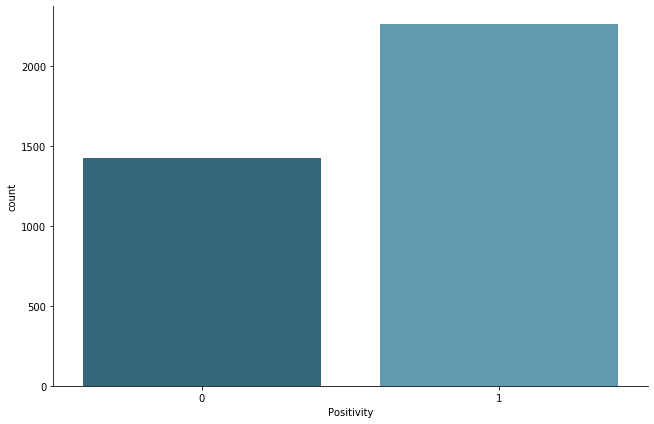

In [25]:
sns.catplot(x="Positivity", data=Motorola, kind="count", size=6, aspect=1.5, palette="PuBuGn_d")
plt.show();

In [26]:
# Step 2: Create a wordcloud
# 2.1 Define word frequency function
def word_freq_dict(text):
    # Convert text into word list
    wordList = text.split()
    # Generate word freq dictionary
    wordFreqDict = {word: wordList.count(word) for word in wordList}
    return wordFreqDict
word_freq_dict("I love reading books. I love music.")

{'I': 2, 'love': 2, 'reading': 1, 'books.': 1, 'music.': 1}

In [27]:
# 2.3 Initializer
from wordcloud import WordCloud, ImageColorGenerator

# Define a function to create a wordcloud from dictionary of word frequency
def wordcloud_from_frequency(word_freq_dict, title, figure_size=(10, 6)):
    wordcloud.generate_from_frequencies(word_freq_dict)
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()
    
# Define a function to plot top10 positive words and top10 negative words in a grouped bar plot (from dictionaries)
def topn_wordfreq_bar_both(pos_word_freq_dict, neg_word_freq_dict, pos_num_doc, neg_num_doc, topn, title, palette, height=6, aspect=2):
    # Transform positive word frequency into DF
    df_pos = pd.DataFrame.from_dict(pos_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_pos.columns = ["frequency"]
    df_pos["frequency"] = df_pos["frequency"] / pos_num_doc
    df_pos["label"] = "Positive"
    # Transform negative word frequency into DF
    df_neg = pd.DataFrame.from_dict(neg_word_freq_dict, orient="index").sort_values(by=0, ascending=False).head(topn)
    df_neg.columns = ["frequency"]
    df_neg["frequency"] = df_neg["frequency"] / neg_num_doc
    df_neg["label"] = "Negative"
    # Append two dataframes
    df_append = df_pos.append(df_neg)
    df_append.reset_index(inplace=True)
    # Plot
    sns.catplot(x="index", y="frequency", hue="label", data=df_append, 
                kind="bar",
                palette=palette,
                height=height, aspect=aspect, 
                legend_out=False)
    plt.title(title)
    plt.show()

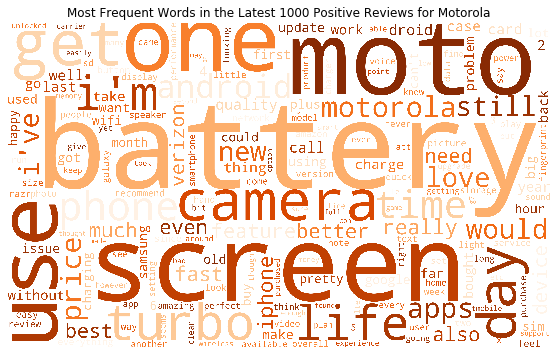

In [28]:
# 2.6 Plot wordclouds for latest 1000 reviews for Xiaomi
Motorola_pos = " ".join(Motorola[Motorola["Positivity"]==1]["Review"][0:1000])
Motorola_pos_word_freq = word_freq_dict(Motorola_pos)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Oranges",
                      background_color="white")
wordcloud_from_frequency(Motorola_pos_word_freq, "Most Frequent Words in the Latest 1000 Positive Reviews for Motorola")

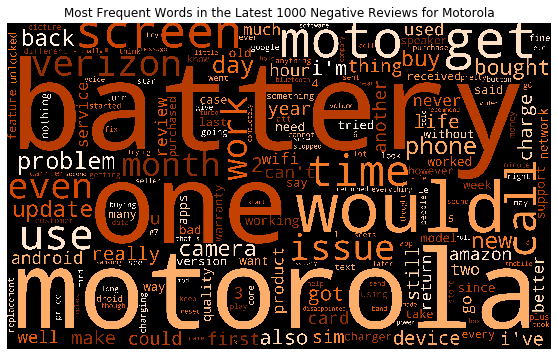

In [29]:
Motorola_neg = " ".join(Motorola[Motorola["Positivity"]==0]["Review"][0:1000])
Motorola_neg_word_freq = word_freq_dict(Motorola_neg)
wordcloud = WordCloud(width=5000, 
                      height=3000, 
                      max_words=200, 
                      colormap="Oranges",
                      background_color="black")
wordcloud_from_frequency(Motorola_neg_word_freq, "Most Frequent Words in the Latest 1000 Negative Reviews for Motorola")

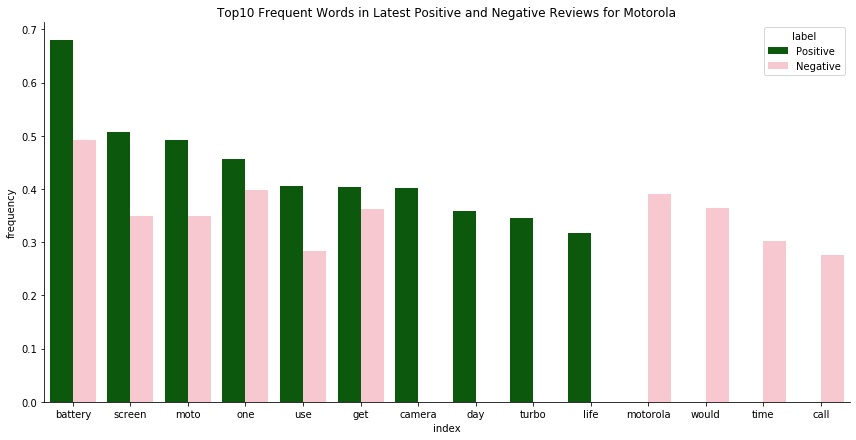

In [30]:
topn_wordfreq_bar_both(Motorola_pos_word_freq, Motorola_neg_word_freq, 
                       min(sum(Motorola["Positivity"]==1), 1000), 
                       min(sum(Motorola["Positivity"]==0), 1000), 
                       10, 
                       "Top10 Frequent Words in Latest Positive and Negative Reviews for Motorola", 
                       ["darkgreen", "pink"], 
                       height=6, aspect=2)

In [31]:
df_Motorola['Review'][1]

'yes u u market call lte extended lte worst wifi calling carrier tmobile supported handset bad since totally fallen love ended trouble trying call location previously used wifi calling returned get g7 one zoom reasonable price offered amazon beware'

In [32]:
df_Motorola["Review"] = df_Motorola["Review"].astype("str")

In [33]:
corpus = []
for i in range(0,3685):
    review = re.sub('[^a-zA-Z]', ' ',df_Motorola['Review'][i])
    review = review.lower()
    corpus.append(review)

In [34]:
corpus

['size color camera battery life onoff button odd place middle right side volume rocket button  easy push accidentally  i ll adapt compared arlier motorola model moto  g android button bottom weird notsogood way one virtual button replaced traditional   button still learning multiple click see running apps weird say weird android o allows user move apps groupedapps easily  frequently cause accidentally move way make appsgroupedapps stickier lockeduntilintentionallyunlocked',
 'yes u u market call lte extended lte worst wifi calling carrier tmobile supported handset bad since totally fallen love ended trouble trying call location previously used wifi calling returned get g  one zoom reasonable price offered amazon beware',
 'large screen still able handle one hand speed decent battery life u dun really charge alot camera brilliant dynamic range night fully compayible moto mod con much accessory available market even screen protector bumper hard find',
 'budget friendly smartphone dont e

In [35]:
df_Motorola

,Review,Positivity
0,size color camera battery life onoff button od...,1
1,yes u u market call lte extended lte worst wif...,0
2,large screen still able handle one hand speed ...,1
3,budget friendly smartphone dont expect highest...,1
4,gift husband samsung galaxy 7 edge broke put q...,1
...,...,...
3680,major unresolved issue motorola going patch dr...,0
3681,month year warranty battery totally shot lasted,0
3682,overall thoroughly disappointed real bummer ws...,0
3683,bought husband want smartphone older version m...,1


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = df_Motorola.iloc[:,1] 

In [37]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[220  76]
 [ 71 370]]


In [38]:
(220 + 370)/737

0.8005427408412483

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8005427408412483
Precision: 0.8295964125560538
Recall: 0.8390022675736961


Text(0.5, 257.44, 'Predicted label')

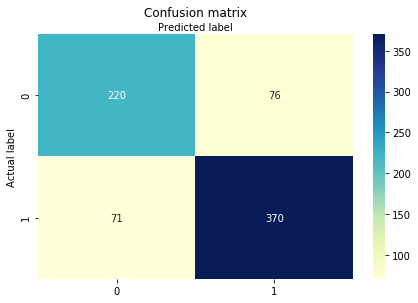

In [40]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
ax.set_ylim(2, 0)
plt.xlabel('Predicted label')

In [46]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

C:\Users\Temor AL-Kaisi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[ 51 245]
 [  5 436]]


In [47]:
(51 + 436)/737

0.66078697421981

In [49]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.66078697421981
Precision: 0.6402349486049926
Recall: 0.9886621315192744


Text(0.5, 257.44, 'Predicted label')

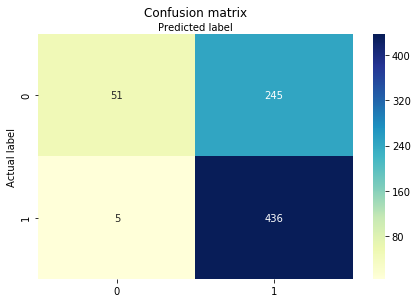

In [48]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
ax.set_ylim(2, 0)
plt.xlabel('Predicted label')